<a href="#Overview"></a>
# Overview
* <a href="#44e1bd8c-77a7-44c6-883c-cdc543158553">Introduction</a>
* <a href="#6c918169-3da8-4a8b-a617-4cb8309b0058">Objectives</a>
* <a href="#47ac4c31-588a-4f23-bb35-0e5695834d35">Goals</a>
* <a href="#ff73f46d-c4fa-44b5-a3e8-395047542ca7">Used in today's class</a>
* <a href="#5a807b5f-976e-462a-91f6-1e9e5ba42dbd">Loading the data</a>
  * <a href="#857290e2-977d-4609-a741-1d66bac0fdaf">Exercise 1: Read a CSV file</a>
* <a href="#5f951bcb-93f0-4b57-9d9e-db805f76d9fc">Selecting and Subtracting Subsets of Data</a>
  * <a href="#1b3a9b5b-f913-4d0a-a80c-3de59e8e7bef">Exercise 2: Creating new datasets</a>
  * <a href="#b928f800-f9e1-4d8e-b370-233ffbe1c1e1">Exercise 3: Calculate poke_latency</a>
  * <a href="#e2a54301-11cc-4ef0-9478-f5db8366f0a3">Exercise 4: If statements</a>
  * <a href="#68d79567-1373-4f9e-99bc-672486d3b7e5">Exercise 5: Averaging the data</a>
* <a href="#997e5a2c-b7b4-4619-aa25-2fcdc8da7074">Functions</a>
  * <a href="#fe12623a-e67f-4b7e-8085-8ee975c02b45">Exercise 6: Making cuepoke_ave function</a>
  * <a href="#25c69516-b3cf-42cb-a2c9-b39c651af88c">Exercise 7: Making rewpoke_ave function</a>
* <a href="#66b88d4c-700e-403f-b0ba-1387413007fd">Summarizing the data and applying our functions</a>
  * <a href="#0524d7aa-a4b8-492d-95bc-a50e779968bb">Exercise 8: Applying our function</a>
  * <a href="#a7018fd6-9b6b-4448-b2e4-c3daacf5160c">Exercise 9: Summary table</a>
  * <a href="#bb78ff6e-dda9-4bd7-8c4f-2a33cebb98ac">Exercise 10: Grouping</a>
* <a href="#5cc960f5-3042-47d6-96e6-fc22fd0f2b72">Plotting</a>

<a id="44e1bd8c-77a7-44c6-883c-cdc543158553"></a>
# Introduction
<a href="#Overview">Return to overview</a>


Today we will be working with data collected from an operant conditioning chamber, which is a commonly used tool for studying animal behavior.  In this experiment, rats were trained to associate a cue (in this case a light) with a sucrose reward.  Animals need to successfully nose-poke after the cue comes on to receive the reward.

![alt text](https://www.researchgate.net/profile/Cyriel_Pennartz/publication/49647166/figure/fig3/AS:272772207214615@1442045370374/Behavioral-testing-chamber-The-behavioral-box-with-stimulus-lights-two-operant-levers.png)

In our operant conditioning box, a laser beam break sensor records the animal's activity and returns values when the beam is broken, so that we know what behavior the animal was perfoming at what time.  For example, in our data, when the animal nose pokes after the cue, the time that passed between the cue onset and the nose poke is recorded and can be called "cue poke latency". The box also gives us a numerical value to denote the action that occured (transition state).  For nose poke, this is 2.

<a id="6c918169-3da8-4a8b-a617-4cb8309b0058"></a>
# Objectives
<a href="#Overview">Return to overview</a>


In this experiment, we wanted to test a novel drug and see how it affects the animal's ability to learn.  With our operant box data, we can assume that if an animal successfully nose pokes after a cue, it has successfully associated the cue with a reward for performing an action.  We can assume that the shorter the time it takes to nose poke after the cue onset, the better the animal has learned this association.  We want to see if the drug reduced the time, or latency, as a measure of learning. 

This will make more sense later, but transition states are:
* 1=cue onset
* 2=nose poke
* 4=reward received

<a id="47ac4c31-588a-4f23-bb35-0e5695834d35"></a>
# Goals
<a href="#Overview">Return to overview</a>


A lot of the data we will be working with is not tidy, so we will first need to clean up the data before we can calculate the animal's cue poke latency, average poke latency (between the nose poke and receiving the reward), and the total number of rewards the animal received.  Then we will plot the data to see if the drug affected learning behavior as compared to controls.

<a id="ff73f46d-c4fa-44b5-a3e8-395047542ca7"></a>
# Used in today's class
<a href="#Overview">Return to overview</a>


* `glob()` - grabs file names can makes them into a list
* `display()` - A function specific to IPython and Jupyter Notebooks that produces a nicely-formatted visual representation of the object (often much nicer than `print`). If you put a variable name by itself on the last line of the cell, Jupyter automatically calls `display` on that variable name which is why you will get a nicely formatted result below the cell.
* `.loc`-  extract data of interest
* `if` statements
* `def` - defining functions
* `for` loops
* `np.subtract()` 
* `str.split()`
* `str.strip()`
* `pd.DataFrame.groupby()`
* `pd.DataFrame.unstack()`
* `plt.subplots()`

<a id="5a807b5f-976e-462a-91f6-1e9e5ba42dbd"></a>
# Loading the data
<a href="#Overview">Return to overview</a>

Let's import some libraries to help us work with the data.  Run the following cell to import the libraries specified:

In [ ]:
import numpy as np
import pandas as pd
from glob import glob
import os.path
import matplotlib.pylab as plt

pd.options.display.max_rows = 10

Let's look at the data we are working with today.  Our data is split into multiple files, organized by day of testing per subject. Here's a screen shot of the first file in our list:


![First CSV file in our list](csv_file_pic1.jpg)

As you can see from the screenshot, we are not interested in a lot of the columns.  The operant box gives us a lot of data that we are not interested in for today's project. Our main focus today will be on Time and Transition State.  

<a id="857290e2-977d-4609-a741-1d66bac0fdaf"></a>
## Exercise 1: Read a CSV file
<a href="#Overview">Return to overview</a>

The first data file is `data/Subj02_20191204_Exp.csv`. 
Go ahead and read it. Please store it in the variable `csv`.

In [ ]:
# Your answer here

Great! Now it would be nice if we could get rid of the columns with NaNs. See if you can find a method to drop (hint) the columns with NaNs. 

Finished? Put up your green flag and try out these bonus exercises. These steps are commonly used when you're learning how to work with a new dataset to help you understand the structure of the file:
1. What are the unique values for `Transition State`? Is there a method on `pd.Series` that can help you? If you get it right, you'll have 5 unique values.
2. Make a dictionary mapping the three transition state numbers to their name. Call the dictionary `transition_state_map`. 

Remember, when making a dictionary, the syntax is:

    dict_name = {key1: value1, key2: value2, ... }
    
A key can be certain Python objects (e.g., strings, floats, ints). Other, more complex, objects (e.g., lists, Numpy arrays, etc.) **cannot** be used as a key. Once you have the answer, I should be able to run the following code:

    print(transition_state_map[1])
    
And see `cue onset` as the answer.

3. Take the `Transition State` column and `map` (hint) the values to their names. Save it as a new column, `Transition State Name`. 

If you're successful:

    csv.loc[:, ['Time', 'Transition State', 'Transition State Name']]
    
Will result in the following:

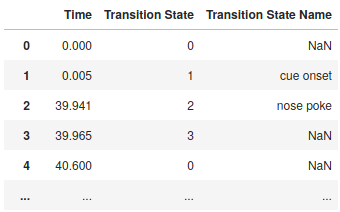

In [ ]:
# Your answer here

In [ ]:
# First, make a copy so we don't affect our original csv dataset when working on the bonus.
csv_bonus = csv.copy()

# Your answer here

Now we have loaded our first file and can start to work with the data.

<a name="#Selecting and subtracting subsets of Data"></a>
<a id="5f951bcb-93f0-4b57-9d9e-db805f76d9fc"></a>
# Selecting and Subtracting Subsets of Data
<a href="#Overview">Return to overview</a>
<a href="#Overview">Return to overview</a>

We will have to use the transition states in order to calculate the values we are interested in.  To do this, we want to make datasets that only contain the rows of data that we are interested in.  For example, the cue is `Transition state 1`, and later we will want to be able to subtract the time between cue onset and nosepoke (`Transition state 2`).

<a id="1b3a9b5b-f913-4d0a-a80c-3de59e8e7bef"></a>
## Exercise 2: Creating new datasets
<a href="#Overview">Return to overview</a>
<a href="#Overview">Return to overview</a>

Remember how to filter specific parts of the data we are interested in? Maybe this cute *masked* baby rat will help remind you:

![alt text](https://i.pinimg.com/474x/17/d4/23/17d423589b0711bcc23a07d56d7e5193--dumbo-rat-ratti.jpg)

First, we'll want to pull out all Transition states equal to 1 and assign them to the variable `cue`. Second, pull out all Transition states equal to 2 and assign them to the variable `poke`.  

This will be four lines of code where we first need to extract rows only containing the transition state we care about and assigning them to a variable.  Then use the `.loc` function to assign your new dataset to the correct variable: `cue` or  `poke`.

In [ ]:
# Your answer here

Let's use the function `display()` to show the first 5 lines of our new datasets.

In [ ]:
# Your answer here

Great the mask worked! Now we have a two sets of data called `cue` and `poke` with rows that only contain data from the transition states we care about.

What column are we interested in in these new sets of data? Remember the goal of what we are trying to calculate: the latency between cue onset and nose poke.

Go ahead and extract the data from the column we are interested in.  Let's assign these to the variables `poke_time` and `cue_time`.  `Print` your results to see if you successfully extracted the right column. 

In [ ]:
# Your answer here

<a id="b928f800-f9e1-4d8e-b370-233ffbe1c1e1"></a>
## Exercise 3: Calculate poke_latency
<a href="#Overview">Return to overview</a>


How can we calculate latency? Let's subtract our `cue_time` from our `poke_time` to get the time between the cue onset and the poke (which we will store as `poke_latency`).

In [ ]:
# Your answer here

What happened!? We got a bunch of non numerical data when we subtracted the variables. Why is this?

It's because Pandas attempts to align rows based on the index before subtracting values. Take a look above where we printed `poke_time` and `cue_time`. Do they have the same index? What is the value for `cue_time` for index 1? What is the value for `poke_time` for index 1? Wherever an index is missing, Pandas substitutes `NaN`.

Since the indices do not align, how can we fix this? Perhaps we should just switch from Pandas Series to Numpy arrays since the index is no longer relevant. How do we do this?

In [ ]:
# Your answer here

Oh no! Another error. This time it occurred because the two arrays we are trying to subtract are different lengths. This occurs when the cue was presented but the 30 minute session ended before the animal was able to respond to the cue. Lets figure out how to make them the same length.

<a id="e2a54301-11cc-4ef0-9478-f5db8366f0a3"></a>
## Exercise 4: If statements
<a href="#Overview">Return to overview</a>


What can we do to fix this?? Well we can use `if` statements to apply conditions where python will only run the body of code when the `if` statement is true. We can think about `if` statements just like how you would read a sentence:

"`if` `variable` is (=,!=, >, < ) `variable2`, then do something, `else` do this other thing".


For example:

In [ ]:
#example: change the value of b or the condition of the if statement 
#to get a different output
a=35
b=34
if b > a:
    print(True)
else:
    print(False)

This allows you to apply conditional logic where you can do one operation `if` condition is true `else` do another operation. For future reference, you can also have multiple conditions using `elif`.

For our purposes, we do not need to include the `else`. If you do not include `else`, then it means we just want to do something only `if` our condition is true, otherwise do nothing.

Think about what we want to be true in terms of the length or size (hint!) of the datasets.  After you write your `if` statement, write code that will eliminate the last entry of the `cue_time` Series. Remember how you can extract a subset of a Series, DataFrame, list or array using slice notation?

    variable[start:stop]

If you leave `start` blank, e.g.,:

    variable[:stop]
    
It's the equivalent to:

    variable[0:stop]

In other words, all values from the beginning up to *up to* the stop index.

If you leave `end` blank, e.g.,:

    variable[start:]
    
It means all values from the start index *up to* the end of the sequence. As a bonus, you can even use negative indexing:

    variable[:-5]
    
This means all values *up to* the fifth index before the end of the sequence. What would you do for *all* but the last index?

Now, go ahead and write an `if` statement that extracts all but the last index in `cue_time` if the length of `cue_time` is not equal to the length of `poke_time`.

In [ ]:
# Your answer here

In [ ]:
# Your answer here

Note that when using `pd.Series[...]` with a slice (i.e., the `:` notation), Pandas defaults to integer-based positional indexing (i.e., equivalent to `iloc`). Brad finds this a bit ambiguous. Let's take a look at the different options we have available for a Series:

    poke_time[2]
    poke_time[:2]
    poke_time.loc[2]
    poke_time.iloc[2]
    poke_time.loc[:2]
    poke_time.iloc[2:]
    
As you can see, when you have an index with integer values, you need to think very carefully about whether you're using *label*-based or *position*-based indexing. You can eliminate this ambiguity by explicitly using `iloc[]` instead of `[]` (check out the second aphorism of Zen of Python by typing `import this`).

In [ ]:
print('First 5 rows of poke_time')
display(poke_time.head())

print('\nResult of poke_time[2]')
display(poke_time[2])

print('\nResult of poke_time[:2]')
display(poke_time[:2])

print('\nResult of poke_time.loc[2]')
display(poke_time.loc[2])

print('\nResult of poke_time.iloc[2]')
display(poke_time.iloc[2])

print('\nResult of poke_time.loc[:2]')
display(poke_time.loc[:2])

print('\nResult of poke_time.iloc[:2]')
display(poke_time.iloc[:2])

import this

<a id="68d79567-1373-4f9e-99bc-672486d3b7e5"></a>
## Exercise 5: Averaging the data
<a href="#Overview">Return to overview</a>
<a href="#Overview">Return to overview</a>

Great! Now we have a variable `cuepoke_lat` equal to the time in between the cue onset and the animal nose poking.  Let's average these values and assign them to the variable `cuepoke_ave`.

In [ ]:
# Your answer here

Now we have collected our first set of usable data.  But only for Day 1, Subject 1, and only for cuepoke_ave.  We could do this for every single file, but it is much easier to write functions that we can apply to all of the files, which is what we will do next!

<a name="#Functions"></a>
<a id="997e5a2c-b7b4-4619-aa25-2fcdc8da7074"></a>
# Functions
<a href="#Overview">Return to overview</a>
<a href="#Overview">Return to overview</a>

Our functions are going to seem very long, but dont worry! We have already done all the steps above and now just need to put them into two functions defined as `cuepoke_ave` and `rewpoke_ave`. The end goal is for the functions to read the file and return the values we need.

<a id="fe12623a-e67f-4b7e-8085-8ee975c02b45"></a>
## Exercise 6: Making cuepoke_ave function
<a href="#Overview">Return to overview</a>
<a href="#Overview">Return to overview</a>

Use the steps we did above to build your function to make a function `cuepoke_ave` that we can apply to all of our files.  Remember to include your `if` condition and the calculations necessary to find the average latency between cue onset and nose poke. Again, don't forget to append the values to the empty list we made earlier. The function needs to:

* Take a single argument, `filename`
* Read in the file.
* Extract the cue and poke times.
* Check to see `if` cue time needs to be trimmed by one value.
* Compute and `return` the average cue-poke latency.

You can test your function by running:

    cuepoke_ave('data/Subj20_20191204_Ctrl.csv')
    
If it returns `41.32971999999998`, you've got it!

Bonus: 

1. Go back to the string formatting notebook and review the section on format specifiers. Now, take the following code:

    result = cuepoke_ave('data/Subj20_20191204_Ctrl.csv')
    sentence = 'Cue-poke latency: {:...}'.format(result)
    print(sentence)
    
Modify the `...` so it prints out the latency only to the first 2 decimal places.

2. Now modify it so you use f-string formatting instead.

Modify the ... so that you get the string  'Cue-poke latency: 41.33'

    result = cuepoke_ave('data/Subj20_20191204_Ctrl.csv')
    sentence = f'...'
    print(sentence)

In [ ]:
# Your answer here

In [ ]:
# Your answer here


<a id="25c69516-b3cf-42cb-a2c9-b39c651af88c"></a>
## Exercise 7: Making rewpoke_ave function
<a href="#Overview">Return to overview</a>


Now do the same for `rewpoke_ave`, which will be the average difference between the nose poke and the reward.  Remember that we will need to create a new mask for reward, because we did not do that earlier.  This mask will contain only rows of data where the Transition State is = 4. 

Copy and paste your previous function, and make changes to the values we are interested in. Name your function `rewpoke_ave`.

We are also interseted in knowing the total amount of reward the animal recieved. To do this, we will want to know how many values are in our 'rew_time' list (i.e., the length). Add the line `countr` = `len(rew_time)`. This will give us the number of rewards the animal received during the session.  We will plot this later.  You can also make a seperate function for rewards received, but this is faster.

You can test your function by running:

    rewpoke_ave('data/Subj20_20191204_Ctrl.csv')
    
If it returns `(19.71088000000004, 25)`, you've got it!

Bonus:
1. Save the output of `rewpoke_ave` to two variables, `reward_latency` and `rewards` using tuple unpacking.
2. Using string formatting, print out the result so that the string reads `Reward-poke latency: 19.7; Number of rewards: 25`.

In [ ]:
# Your answer here

In [ ]:
# Your answer here

Great now we have two functions: `cuepoke_ave` and `rewpoke_ave`. Note how we returned *two* values from the `rewpoke_ave` function.

<a id="66b88d4c-700e-403f-b0ba-1387413007fd"></a>
# Summarizing the data and applying our functions
<a href="#Overview">Return to overview</a>


Now we are going to apply our function each of the files and make a nice summary table that we can use to plot our data.  First, use `glob()` to make a list of the files in our data set. Hint: we want all of the files that end in '.csv'. Store this list in the variable `datasets`. Remember that you can use a asterisk, `*`, to match one or more characters in the filename.

Bonus:
1. What if you only want the files ending in `Exp.csv`? How would you do it (be sure to save in a variable called `exp_datasets` so you don't accidentally overwrite `datasets` since we will need a list with *both* experimental and control files for the rest of the exercise.
2. What about only the files for Subject 19?

In [ ]:
# Your answer here

In [ ]:
# Your answer here

<a id="0524d7aa-a4b8-492d-95bc-a50e779968bb"></a>
## Exercise 8: Applying our function
<a href="#Overview">Return to overview</a>


Now we are going to apply our function to our new dataset containing all of our files. 

**Discussion**
* How can we apply our functions to each file in the dataset? 
* How might we save the output of the functions for each file? What's a good Python datatype to use?
* `rewpoke_ave` returns two values. How do we handle this?

Ok, now go ahead and do it! Once you're successful, the three lists `poke_latencies`, `reward_latencies` and `rewards` should have one entry per file in them. Print them out to make sure they look good. If you got it right, `print(rewards)` will show the following:

    [14, 42, 50, 50, 50, 50, 50, 50, 47, 7, 50, 25, 50, 50, 50, 50, 50, 24, 14, 50, 18, 50, 50, 50]
    
Bonus exercises:
1. Using enumerate to count the loop number and string formatting, modify the for loop so that it prints out the loop number and the filename

You should get something that looks like this below the cell:

    File 0: data/Subj19_20191204_Exp.csv
    File 1: data/Subj20_20191205_Ctrl.csv
    File 2: data/Subj20_20191207_Ctrl.csv
    File 3: data/Subj19_20191206_Exp.csv
    File 4: data/Subj02_20191208_Exp.csv
    File 5: data/Subj02_20191205_Exp.csv
    File 6: data/Subj20_20191208_Ctrl.csv
    File 7: data/Subj02_20191207_Exp.csv
    ...
    
2. Now, modify it so it prints out the percent done (you need to know how many files you need to process and then divide the loop number by the number of files and multiply by 100). 

When you're complete, you should get the following output:

     0% - File 0: data/Subj19_20191204_Exp.csv
     4% - File 1: data/Subj20_20191205_Ctrl.csv
     8% - File 2: data/Subj20_20191207_Ctrl.csv
    12% - File 3: data/Subj19_20191206_Exp.csv
    17% - File 4: data/Subj02_20191208_Exp.csv
    21% - File 5: data/Subj02_20191205_Exp.csv
    25% - File 6: data/Subj20_20191208_Ctrl.csv
    29% - File 7: data/Subj02_20191207_Exp.csv
    ...

In [ ]:
poke_latencies = []
reward_latencies = []
rewards = []

# Your answer here

In [ ]:
# Bonus answer

poke_latencies = []
reward_latencies = []
rewards = []

# Your answer here

Great! Now we have three lists filled with the data we are interested in.

<a id="a7018fd6-9b6b-4448-b2e4-c3daacf5160c"></a>
## Exercise 9: Summary table
<a href="#Overview">Return to overview</a>


It's great that we now have two lists with the data we are interested in, but it is not very nice to look at, and difficult to tell what subject and what day we are looking at.  We can make a summary table that is much more pleasant to look at with the columns we are interested in.

First, let's build an empty dataframe, a two-dimensional labeled data structure with columns we can choose to build in our DataFrame later. Store your empty dataframe in the variable `summary`.

In [ ]:
# Your answer here

Now we need to make our columns.  Lets start with `File`, `Ave CP Lat`, `Ave PR Lat`, `Total Rewards`.  Make these columns and set them equal to the data they should contain. (hint: we defined the variables above).

Bonus:

There's an alternate approach to creating our DataFrame. Instead of creating an empty DataFrame and then adding the columns, the `pd.DataFrame` function can take a dictionary where the keys are column names and the values are the column data. The values of the dictionary must be a scalar, list or array. Go ahead and try it (save the result as `bonus_summary` so you don't overwrite the `summary` you created earlier:
1. Create a dictionary where the keys are the column names (e.g., `'File'`, `'Ave CP Lat'`, etc.) and the values are the lists you created (e.g., `datasets`, `poke_latencies`, etc.).
2. Pass this dictionary to the `pd.DataFrame` function. How does this compare with the approach above?
3. What happens if your dictionary has a value that's a scalar? Test it out. Add a key `'Test Key'` with the value `'Test Value'`.

In [ ]:
# Your answer here

In [ ]:
# Your answer here

There is a lot of info stored in the file name including the Subject, date the animal was run, and whether the animal was in the control or experimental group:

    Subj02_20191204_Exp.csv

Remember that Python has string functions that let you split a string based on a character, e.g.:

    x = Subj02_20191204_Exp.csv
    values = x.split('_')
    
What does `values` look like? Pandas Series containing text data have a special accessor, `str`, that allows you to perform all the common string operations on each value in the series.

    series.str.split(...)

Lets split (hint) up that name for each value in the `File` column. We want to get a *DataFrame* back (with three columns). Take a look at the documentation for `pandas.Series.str.split`. What might be a good way to get a DataFrame back? If you're successful, your answer will look like:

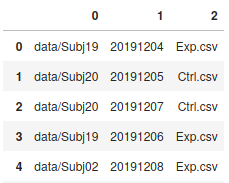

In [ ]:
# Your answer here

Now, remove `'.csv'` fgrom the last column. Are there any good string methods that you can use?

Bonus:
Get rid of `data/` for the first column.

In [ ]:
# Your answer here

Now, add the columns from `df_file` to `summary`. The columns in `summary` should be called Subject, Date and Type (corresponding to 0, 1 and 2 in `df_summary`). There are many ways you can do this (e.g., you could get creative and do something like `pd.merge` or `pd.DataFrame.join`), but let's keep it simple and use basic assignment:

    summary[column] = df_file[column]
    
Bonus:
Can you assign all three columns in one line of code?

In [ ]:
# Your answer here

<a id="bb78ff6e-dda9-4bd7-8c4f-2a33cebb98ac"></a>
## Exercise 10: Grouping
<a href="#Overview">Return to overview</a>


Now that we have a nice summary table, let's group the data based on the conditions of the experiment.  We want to compare mean latencies and total rewards across experimental condition and session.  Which columns will we need to group by?

In [ ]:
# Your answer here

Looks good.  But now that we're grouping by experimental condition and day, the data are no longer in a format where the `plot` function will know what to do with it. We want to reshape the DataFrame so that there's one row per **Date** and one column for each combination of **Type** (Ctl and Exp) and measure (Ave CP Lat, Ave PR Lat, Total Rewards). How might we unstack (hint) the **Type** level of the index? Save the result as `grouping_unstacked`. If you're successful, your result will have six rows and six columns and look like this:

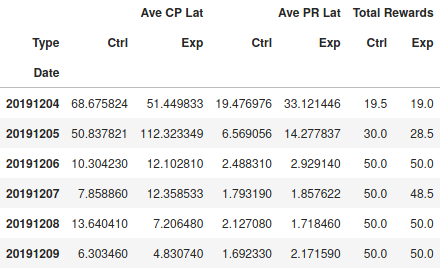

In [ ]:
# Your answer here

How might we extract the two columns, `Exp` and `Ctrl` for `Ave CP Lat`? We haven't really talked about what happens when the columns have more than one level. Let's try it.

In [ ]:
grouping_unstacked['Ave CP Lat']

Looks like we got a two-column dataframe back with only one level for the columns (Ctrl and Exp). Remember how `plt.plot` works with DataFrames? How does it determine the x-values?

In [ ]:
figure, ax = plt.subplots(1, 2, figsize=(9, 3))
ax[0].plot(grouping_unstacked)
ax[1].plot(grouping_unstacked['Ave CP Lat'])

See the difference in the number of lines when we plot the entire `grouping_unstacked` vs only a subset?

Now we can finally start plotting our data!

<a id="5cc960f5-3042-47d6-96e6-fc22fd0f2b72"></a>
# Plotting
<a href="#Overview">Return to overview</a>


We are going to use the plotting we learned last class: `plt.subplots`.  Make a figure with 3 subplots (one column with 3 rows) for our three variables of interest: `Ave CP Lat`, `Ave PR Lat`, and `Total Rewards` using `plt.subplots`. Play around with the size of the figure (pass an argument to the `figsize` parameter of `plt.subplots`) until it results in something that looks appropriate. When plotting the data, plot it with markers and a line connecting the points. Also be sure to make appropriate titles and axis labels.

When you are finished, put up a green flag and go on to the bonus exercise.

Bonus Exercises:
1. These graphs all share an x axis, can you figure out how to create a figure with a shared x axis for all the subplots?
2. Add a legend. 
3. We have our 3 graphs, but it might be nicer if we changed the x axis labels to Day 1, Day 2, etc rather than having the actual date.  Go ahead and see if you can try to find how to change the ticks on the x axis to have different labels.
4. How can we **tight**en (hint) up our figure **layout** to make it look prettier?

In [ ]:
# Your answer here

Discussion: What can we infer from the Average cue poke latency graph?